<a href="https://colab.research.google.com/github/aciofo/AI-Engineering/blob/main/machine-learning-algorithms/gradient-descent/gradient-descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from sklearn.utils import shuffle

In [3]:
random_seed = 0

## Regressione

In [4]:
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
X, y = make_regression(n_samples=100, n_features=50, bias = 5., noise=20., random_state=random_seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)

In [6]:
model = SGDRegressor(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor()

In [7]:
def evaluate(model, data):
  X, y = data

  y_pred = model.predict(X)
  print(f"MSE = {mean_squared_error(y, y_pred)}")
  print(f"R2 = {r2_score(y, y_pred)}")

In [8]:
evaluate(model, (X_train, y_train))

MSE = 50.48799502251044
R2 = 0.997546887635684


In [9]:
evaluate(model, (X_test, y_test))

MSE = 635.9534963187599
R2 = 0.9577412816172955


C'è overfitting, quindi penalizzo tramite L1 e L2 tramite ElasticNet

In [10]:
model = SGDRegressor(max_iter=5000, penalty = 'elasticnet', alpha=0.01, l1_ratio=0.9, learning_rate='adaptive') #learning rate che varia durante le diverse epoche del gradient descent
model.fit(X_train, y_train)

SGDRegressor(alpha=0.01, l1_ratio=0.9, learning_rate='adaptive', max_iter=5000,
             penalty='elasticnet')

In [11]:
evaluate(model, (X_train, y_train))

MSE = 50.83007013676263
R2 = 0.997530266878771


In [12]:
evaluate(model, (X_test, y_test))

MSE = 626.3905582835829
R2 = 0.9583767329634696


## Classificazione con Stochastic Gradient Descent (SDG)

In [13]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, log_loss

In [14]:
X, y = make_classification(
    n_samples=100,
    n_features=30,
    n_informative=30,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=random_seed
)

In [33]:
def evaluate(model, data):
  X, y = data

  y_pred = model.predict(X)

  print(f"Accuracy = {accuracy_score(y, y_pred)}")
  print(f"Log loss = {log_loss(y, y_pred)}")

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)

In [17]:
model = SGDClassifier()
model.fit(X_train, y_train)

SGDClassifier()

In [18]:
evaluate(model, (X_train, y_train))

Accuracy = 0.9428571428571428
Log loss = 2.0596373365209804


In [19]:
evaluate(model, (X_test, y_test))

Accuracy = 0.7666666666666667
Log loss = 8.410185790794003


In [23]:
def evaluate(model, data):
  X, y = data

  y_pred = model.predict(X)
  print(f"MSE = {mean_squared_error(y, y_pred)}")
  print(f"R2 = {r2_score(y, y_pred)}")

In [24]:
model = SGDRegressor(max_iter=5000, penalty = 'elasticnet', alpha=0.01, l1_ratio=0.9, learning_rate='constant', eta0=10) #learning rate che varia durante le diverse epoche del gradient descent
model.fit(X_train, y_train)

SGDRegressor(alpha=0.01, eta0=10, l1_ratio=0.9, learning_rate='constant',
             max_iter=5000, penalty='elasticnet')

In [25]:
evaluate(model, (X_train, y_train))

MSE = 1.6962030907964393e+30
R2 = -6.874603097520722e+30


## Mini batch Gradient Descent

In [40]:
X, y = make_classification(
    n_samples=100,
    n_features=30,
    n_informative=30,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=random_seed
)

In [41]:
epochs = 5
n_batches = X_train.shape[0]
batch_size = X_train.shape[0] / n_batches

In [42]:
classes = np.unique(y_train)

tick = time()

sgd = SGDClassifier(loss='log_loss')
sgd_loss = []

for epoch in range(epochs):

  X_shuffled, y_shuffled = shuffle(X_train, y_train)

  for batch in range(n_batches):

    batch_start = int(batch * batch_size)
    batch_end = int((batch + 1) * batch_size)
    X_batch = X_shuffled[batch_start:batch_end,:]
    y_batch = y_shuffled[batch_start:batch_end]

    sgd.partial_fit(X_batch, y_batch, classes=classes)
    loss = log_loss(y_train, sgd.predict_proba(X_train), labels = classes)
    sgd_loss.append(loss)

  print(f"Loss all'epoca {epoch+1}: {loss}")

print(f"Addestramento completato in {time() - tick:.2f} secondi")

Loss all'epoca 1: 7.794709729116349
Loss all'epoca 2: 8.2385612367259
Loss all'epoca 3: 7.2087306778487585
Loss all'epoca 4: 7.20873067782343
Loss all'epoca 5: 7.20873067782343
Addestramento completato in 0.71 secondi


In [45]:
def train_history(losses, title):
  plt.figure(figsize=(12, 8))
  plt.title(title)
  plt.xlabel('Iterazione')
  plt.ylabel('Log-Loss')
  plt.plot(losses)

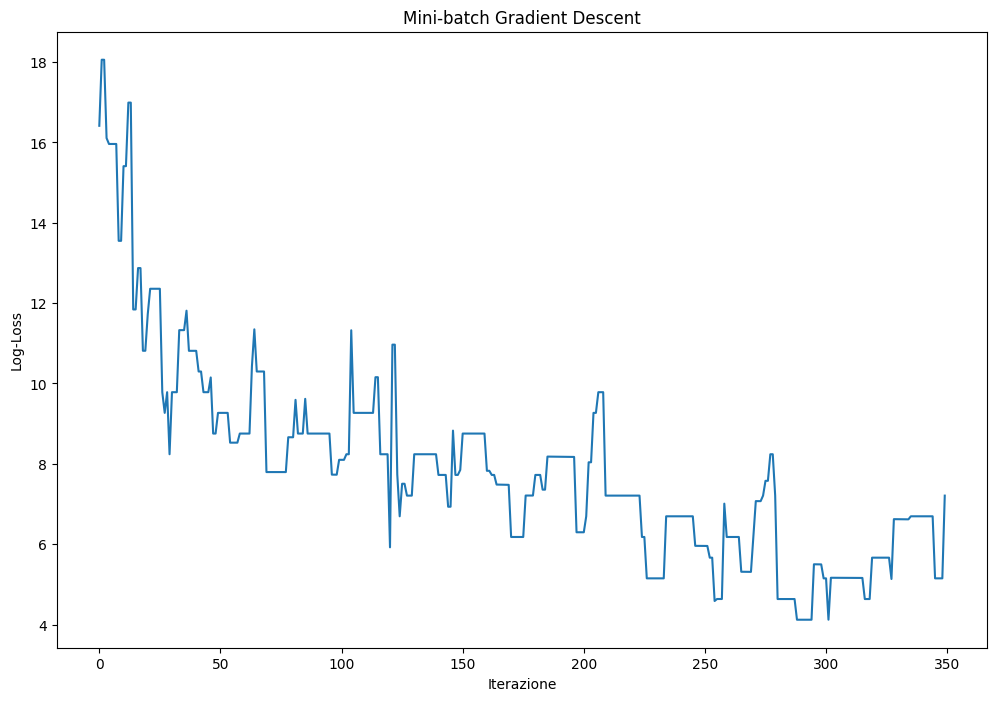

In [46]:
train_history(sgd_loss, 'Mini-batch Gradient Descent')

## Early stopping

In [49]:
# se dopo 5 iterazioni la funzione di costo non è migliorata almeno della tollerance
# allora interrompo addestramento

epochs = 70
n_batches = 12
batch_size = X_train.shape[0] / n_batches

tollerance = 0.0001
n_iter_no_change = 5
n_iter_count = 0

best_loss = 100

classes = np.unique(y_train)

tick = time()

sgd = SGDClassifier(loss='log_loss')
sgd_loss = []

for epoch in range(epochs):

  X_shuffled, y_shuffled = shuffle(X_train, y_train)

  for batch in range(n_batches):

    batch_start = int(batch * batch_size)
    batch_end = int((batch + 1) * batch_size)
    X_batch = X_shuffled[batch_start:batch_end,:]
    y_batch = y_shuffled[batch_start:batch_end]

    sgd.partial_fit(X_batch, y_batch, classes=classes)
    loss = log_loss(y_train, sgd.predict_proba(X_train), labels = classes)
    sgd_loss.append(loss)

  if loss >= best_loss - tollerance:
    if n_iter_count >= n_iter_no_change:
      print(f"Early stopping in epoca {epoch+1}")
      break
    else:
      n_iter_count += 1
  else:
    n_iter_count = 0
    best_loss = loss

  print(f"Loss all'epoca {epoch+1}: {loss}")

print(f"Addestramento completato in {time() - tick:.2f} secondi")

Loss all'epoca 1: 8.238549433600415
Loss all'epoca 2: 7.723640011953676
Loss all'epoca 3: 8.753458680219623
Loss all'epoca 4: 4.634184007191555
Loss all'epoca 5: 6.17891200956294
Loss all'epoca 6: 4.5325542336882485
Loss all'epoca 7: 5.665708212186783
Loss all'epoca 8: 3.1357255788948764
Loss all'epoca 9: 4.634184007173203
Loss all'epoca 10: 6.17891200956294
Loss all'epoca 11: 3.2116140150471892
Loss all'epoca 12: 5.14909334130245
Loss all'epoca 13: 6.545761820941593
Early stopping in epoca 14
Addestramento completato in 0.56 secondi
